In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from functions import *

# Load the Data

In [4]:
DATA_PATH = '../data/quotebank_attr_2015-2020.json.bz2'
df = pd.read_json(DATA_PATH)
preprocess_dataframe(df)
df.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
0,2015-10-05-010038,At Neath Food Festival with a vegetarian platt...,Bethan Jenkins,[Q4897688],2015-10-05 05:00:00,1,"[[Bethan Jenkins, 0.8565], [None, 0.1435]]",[http://www.southwales-eveningpost.co.uk/Town-...,E,Q4897688,None,None,None,None,None,None,None,[southwales-eveningpost.co.uk]
1,2015-11-28-006688,"But if I had to choose my favourite recipe, it...",Trish Deseine,[Q7843986],2015-11-28 00:00:00,1,"[[Trish Deseine, 0.7664], [None, 0.1125], [Kei...",[http://www.irishexaminer.com/lifestyle/featur...,E,Q7843986,None,None,None,None,None,None,None,[irishexaminer.com]
2,2015-11-10-015422,"Children are learning about responsibility, te...",David Price,"[Q1176177, Q16063598, Q20804677, Q20973688, Q3...",2015-11-10 19:30:41,1,"[[David Price, 0.7849], [None, 0.2151]]",[http://news.ifas.ufl.edu/2015/11/ufifas-bok-t...,E,None,None,None,None,None,None,None,None,[ufl.edu]
3,2015-01-16-054273,Once we have added all the vegetables and stoc...,NaN,[],2015-01-16 11:40:11,4,"[[None, 0.6778], [Catherine O'Neill, 0.3222]]",[http://www.bromsgrovestandard.co.uk/2015/01/1...,E,None,None,None,None,None,None,None,None,"[bromsgrovestandard.co.uk, bromsgrovestandard...."
4,2015-02-20-089622,vegans in a steakhouse.,Jim Gaffigan,[Q2093638],2015-02-20 00:05:44,1,"[[Jim Gaffigan, 0.7894], [None, 0.2106]]",[http://unfspinnaker.com/expect-jim-gaffigans-...,E,Q2093638,[male],[United States of America],[+1966-07-07T00:00:00Z],None,"[screenwriter, film producer, television actor...",None,None,[unfspinnaker.com]


# Analysis

## Evolution of the number of quotations

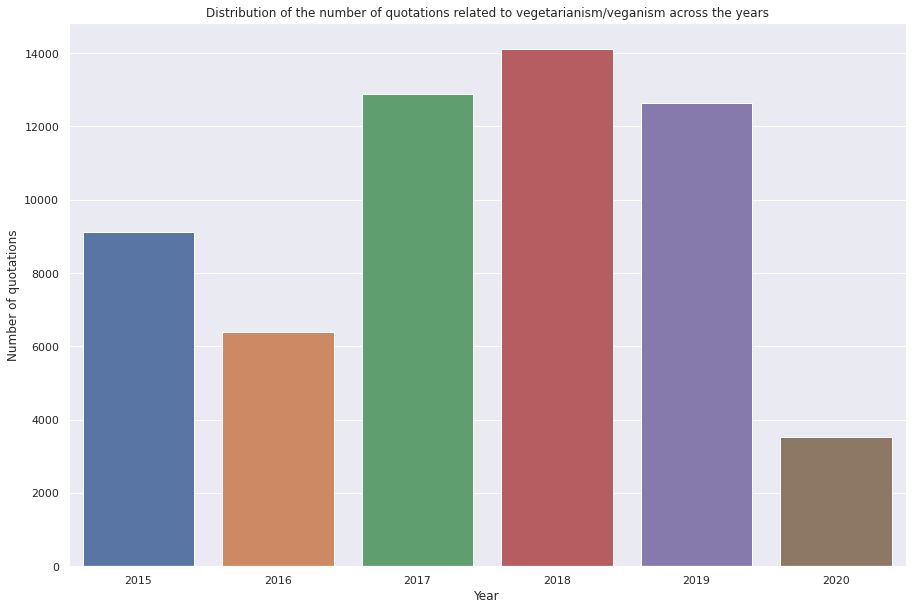

In [6]:
# Select the quotations related to vegetarianism
keywords = ['vegetarianism', 'vegan', 'veget']
selected_quotations = df[df['quotation'].apply(lambda quote: any([keyword in quote for keyword in keywords]))]

# Plot
sns.set_theme(style='darkgrid')
plt.figure(figsize=(15, 10))
ax = sns.countplot(x=selected_quotations['date'].apply(lambda date: date.year), data=selected_quotations)
title = ax.set_title('Distribution of the number of quotations related to vegetarianism/veganism across the years')
xlabel = ax.set_xlabel('Year')
ylabel = ax.set_ylabel('Number of quotations')

We can see an coverage increase of the vegetarianism movement. It could be interesting to understand why there are more quotations from 2017, 2018 and 2019. 

We export this data for use in the datastory:

In [16]:
count_per_year = group_by_date_col(df, 'date', 'YS').size().rename('count').reset_index()

export_as_json({
    'date': list(map(str, count_per_year['date'])),
    'count': list(count_per_year['count'])
}, '../js_data/count_per_year.json')